In [27]:
import pandas as pd
import reviews_explore as e
import reviews_exp_vis_pf as v

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
ny = pd.read_csv("ny_reviews_sentiment.csv")
ny.head()

,camis,dba,boro,phone,inspection_date,latitude,longitude,cuisine_description,action,score,grade,full_address,violation_code,violation_description,last_inspection_date,reviews,neg,neu,pos,compound
0,40364439,SEVILLA RESTAURANT,Manhattan,2129293189,2021-08-04,40.734908,-74.002973,Latin American,Violations cited,27,B,62 CHARLES STREET 10014,10B 04L 02H 04H 08A,Plumbing not properly installed or maintained;...,2020-08-04,horrible food slow service seafood paella tast...,0.084,0.673,0.244,0.9975
1,40364439,SEVILLA RESTAURANT,Manhattan,2129293189,2022-05-18,40.734908,-74.002973,Latin American,Violations cited,19,B,62 CHARLES STREET 10014,04L 08C 06C 08A,Evidence of mice or live mice present in facil...,2021-08-04,superb havent good paella since moving back ny...,0.041,0.630,0.330,0.9998
2,40364439,SEVILLA RESTAURANT,Manhattan,2129293189,2023-05-17,40.734908,-74.002973,Latin American,Violations cited,12,A,62 CHARLES STREET 10014,10B 04L 08A,Anti-siphonage or back-flow prevention device ...,2022-05-18,gem ocano nyc spanish dish old school spanish ...,0.055,0.581,0.365,1.0000
3,40365904,MEE SUM CAFE,Manhattan,2123495260,2021-10-13,40.714861,-73.998200,Coffee/Tea,Violations cited,67,C,26 PELL STREET 10013,02G 04A 08A 06C 02B 04N 05D 10B 10F 09C 06F,Cold food item held above 41º F (smoked fish a...,2020-10-13,authentic place point needed lot help managed ...,0.060,0.688,0.252,0.7717
4,40365904,MEE SUM CAFE,Manhattan,2123495260,2021-11-24,40.714861,-73.998200,Coffee/Tea,Violations cited,24,B,26 PELL STREET 10013,10F 02G 02B 06C 10B,Non-food contact surface improperly constructe...,2021-10-13,really great classic chinese comfort food grea...,0.000,0.537,0.463,0.9468


In [29]:
ny = ny.drop(columns=['latitude', 'longitude', 'phone', 'action', 'full_address', 'violation_code', 'violation_description'])

In [30]:
ny.grade.unique()

array(['B', 'A', 'C'], dtype=object)

In [31]:
counts = e.counts_and_ratios(ny, "grade")
counts

,n,percent
grade,,
A,2687,0.583496
B,1103,0.239522
C,815,0.176982


In [ ]:
a_reviews, b_reviews, c_reviews, all_reviews = e.join_text(ny)
a_words, b_words, c_words, all_words = e.list_words(ny, 'reviews')
a_freq, b_freq, c_freq, all_freq = e.word_freq(ny)

In [32]:
word_counts = e.word_counts(ny, reset_index=False)

In [32]:
word_counts_w = e.word_counts(ny, reset_index=True)

In [33]:
word_counts_w

,word,All,A,B,C
1,wa,56400,28911,14838,12651
2,food,41029,20580,11000,9449
3,good,29106,15165,7608,6333
4,great,26043,13552,6873,5618
5,place,22097,11677,5669,4751
...,...,...,...,...,...
45182,hippy,1,0,0,1
45183,hippie,1,1,0,0
45184,hiphoprbtrap,1,0,1,0
45185,hintofindian,1,1,0,0


In [39]:
word_counts_w.shape

(45186, 5)

In [33]:
# Capitalize values in the 'column_name' column
word_counts.index = word_counts.index.str.capitalize()

word_counts.head(5)


,All,A,B,C
Wa,56400,28911,14838,12651
Food,41029,20580,11000,9449
Good,29106,15165,7608,6333
Great,26043,13552,6873,5618
Place,22097,11677,5669,4751


In [30]:
from scipy.stats import chi2_contingency

def chi2_test_for_all_words(df):
    """
    Perform a Chi-square test for each word in the dataframe to determine its association with the programming languages.

    Args:
    - df (pd.DataFrame): Dataframe containing word frequencies across programming languages.

    Returns:
    - pd.DataFrame: Dataframe with words and their corresponding p-values.
    """

    # Lists to store results
    words = []
    p_values = []

    # Total word counts for each language
    total_word_counts = df[['A', 'B', 'C']].sum()

    # Iterate over each word in the dataframe
    for index, row in df.iterrows():
        # Construct the contingency table
        contingency_table = [list(row[['A', 'B', 'C']]),
                             list(total_word_counts - row[['A', 'B', 'C']])]
        
        # Perform the Chi-square test
        _, p, _, _ = chi2_contingency(contingency_table)
        
        # Append the results
        words.append(row['word'])
        p_values.append(p)

    # Create a dataframe for the results
    results_df = pd.DataFrame({'word': words, 'p_value': p_values})
    return results_df

In [34]:

# Perform the Chi-square test for each word in the dataframe
chi2_results = chi2_test_for_all_words(word_counts_w)

# Display the first few rows of the results
chi2_results.head()

,word,p_value
0,wa,1.436471e-13
1,food,2.151285e-27
2,good,4.472467e-02
3,great,1.535160e-02
4,place,9.962617e-01


In [35]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi2_test_for_grade_c(df):
    """
    Perform a Chi-square test for each word in the dataframe to determine its association with grade 'C'.

    Args:
    - df (pd.DataFrame): Dataframe containing word frequencies across grades 'A', 'B', and 'C'.

    Returns:
    - pd.DataFrame: Dataframe with words and their corresponding p-values, sorted by p-value.
    """

    # Lists to store results
    words = []
    p_values = []

    # Total counts for non-C grades (A and B)
    total_non_c_counts = df['A'] + df['B']

    # Iterate over each word in the dataframe
    for index, row in df.iterrows():
        # Construct the contingency table
        # Row for grade C counts vs. non-C counts for the word
        word_c_count = row['C']
        word_non_c_count = total_non_c_counts[index]
        
        # Row for grade C counts vs. non-C counts for all other words
        other_c_count = df['C'].sum() - word_c_count
        other_non_c_count = total_non_c_counts.sum() - word_non_c_count
        
        contingency_table = [[word_c_count, word_non_c_count],
                             [other_c_count, other_non_c_count]]

        # Perform the Chi-square test
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        
        # Append the results
        words.append(row['word'])
        p_values.append(p)

    # Create a dataframe for the results
    results_df = pd.DataFrame({'word': words, 'p_value': p_values})
    
    # Sort the DataFrame by p-value in ascending order
    results_df = results_df.sort_values(by='p_value')

    return results_df


In [36]:

# Example usage:
# Assuming 'df' is your DataFrame with the word frequencies
chi2_results_c = chi2_test_for_grade_c(word_counts_w)
print(chi2_results_c)


                 word       p_value
289          dumpling  6.721487e-41
380             donut  7.225439e-38
1614           fondue  5.711255e-29
58           sandwich  1.540030e-27
591              crab  2.666262e-25
...               ...           ...
25042  spacemanhighly  1.000000e+00
25041           spac3  1.000000e+00
25040           spade  1.000000e+00
25069    smackalicous  1.000000e+00
45185             🫶🫶🫶  1.000000e+00

[45186 rows x 2 columns]


In [37]:
significant_words = chi2_results_c[chi2_results_c['p_value'] < 0.05]
significant_words.shape

(1177, 2)

In [38]:
significant_words.head()

,word,p_value
289,dumpling,6.721487e-41
380,donut,7.225439e-38
1614,fondue,5.711255e-29
58,sandwich,1.540030e-27
591,crab,2.666262e-25


In [34]:
word_counts['A '] = (word_counts['A'] / word_counts['All']) * 100
word_counts['B '] = (word_counts['B'] / word_counts['All']) * 100
word_counts['C '] = (word_counts['C'] / word_counts['All']) * 100
word_counts.head()

,All,A,B,C,A,B,C
Wa,56400,28911,14838,12651,51.260638,26.308511,22.430851
Food,41029,20580,11000,9449,50.159643,26.810305,23.030052
Good,29106,15165,7608,6333,52.102659,26.138940,21.758400
Great,26043,13552,6873,5618,52.037016,26.390969,21.572016
Place,22097,11677,5669,4751,52.844278,25.655066,21.500656


In [35]:
word_prop_c_high = word_counts[(word_counts['C'] > 100) & ((word_counts['A '] < word_counts['C ']) | (word_counts['B '] < word_counts['C ']))]

word_prop_c_high = word_prop_c_high.sort_values('C ', ascending=False)
word_prop_c_high.head(20)

,All,A,B,C,A,B,C
Crepe,354,104,100,150,29.378531,28.248588,42.372881
Crab,492,167,124,201,33.943089,25.203252,40.853659
Boba,345,153,57,135,44.347826,16.521739,39.130435
Dumpling,1085,464,206,415,42.764977,18.986175,38.248848
Seafood,712,310,165,237,43.539326,23.174157,33.286517
Ramen,468,126,191,151,26.923077,40.811966,32.264957
Noodle,1254,531,336,387,42.344498,26.794258,30.861244
Rib,365,161,92,112,44.109589,25.205479,30.684932
Wrap,346,159,83,104,45.953757,23.988439,30.057803
Pork,1359,547,404,408,40.250184,29.727741,30.022075


In [36]:
word_prop_c_high = word_prop_c_high[['All','A ', 'B ', 'C ']]
word_prop_c_high.head(20)

,All,A,B,C
Crepe,354,29.378531,28.248588,42.372881
Crab,492,33.943089,25.203252,40.853659
Boba,345,44.347826,16.521739,39.130435
Dumpling,1085,42.764977,18.986175,38.248848
Seafood,712,43.539326,23.174157,33.286517
Ramen,468,26.923077,40.811966,32.264957
Noodle,1254,42.344498,26.794258,30.861244
Rib,365,44.109589,25.205479,30.684932
Wrap,346,45.953757,23.988439,30.057803
Pork,1359,40.250184,29.727741,30.022075


In [37]:
# Assuming word_prop_c_high is your existing DataFrame
# Step 1: Keep the 'All' column
# Step 2: Rename 'A' to 'Pass'
word_prop_c_high.rename(columns={'A ': 'Pass'}, inplace=True)

# Step 3: Sum 'B' and 'C' into 'Fail'
word_prop_c_high['Fail'] = word_prop_c_high['B '] + word_prop_c_high['C ']

# Drop the old 'B' and 'C' columns
word_prop_c_high.drop(columns=['B ', 'C '], inplace=True)

# Now your DataFrame should have columns: 'All', 'Pass', 'Fail'
word_prop_c_high.head()

,All,Pass,Fail
Crepe,354,29.378531,70.621469
Crab,492,33.943089,66.056911
Boba,345,44.347826,55.652174
Dumpling,1085,42.764977,57.235023
Seafood,712,43.539326,56.460674


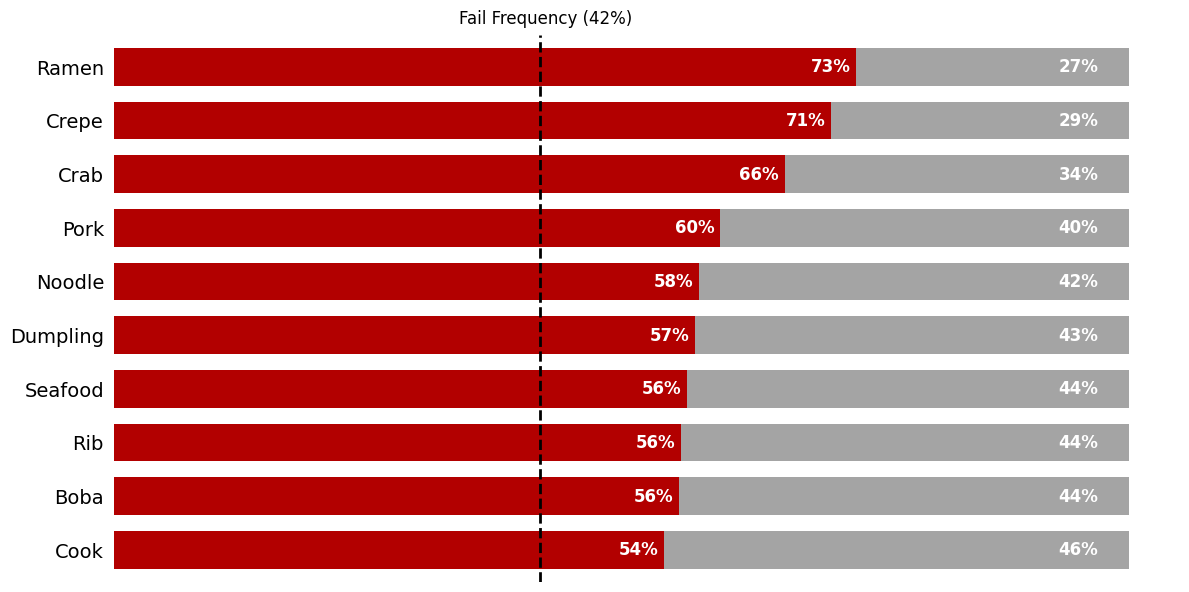

In [40]:
custom_colors = {'Pass': '#a4a4a4', 'Fail': '#B20000', 'All': 'grey'}
v.plot_top_words_freq(word_prop_c_high, column='Fail', top_n=10, include_all=False, custom_colors=custom_colors, figsize=(12, 6), title='', reference_line_percent=42)

In [43]:
word_prop_c_low = word_counts[(word_counts['All'] > 200) & (word_counts['C '] < 17)]

word_prop_c_low = word_prop_a_high.sort_values('C ', ascending=True).head(10)
word_prop_c_low

,All,A,B,C
Doughnut,210,84.761905,14.285714,0.952381
Donut,840,75.833333,20.952381,3.214286
Dunkin,314,79.617834,16.560510,3.821656
Karaoke,234,71.794872,22.222222,5.982906
Pastrami,222,82.882883,10.810811,6.306306
Thru,229,72.925764,19.213974,7.860262
Subway,213,80.281690,11.267606,8.450704
Cookie,242,72.727273,17.768595,9.504132
Starbucks,433,75.519630,14.780600,9.699769
Dog,377,67.374005,22.811671,9.814324


In [44]:
word_prop_c_low = word_prop_c_low[['All','A ', 'B ', 'C ']]
word_prop_c_low.head(20)

,All,A,B,C
Doughnut,210,84.761905,14.285714,0.952381
Donut,840,75.833333,20.952381,3.214286
Dunkin,314,79.617834,16.560510,3.821656
Karaoke,234,71.794872,22.222222,5.982906
Pastrami,222,82.882883,10.810811,6.306306
Thru,229,72.925764,19.213974,7.860262
Subway,213,80.281690,11.267606,8.450704
Cookie,242,72.727273,17.768595,9.504132
Starbucks,433,75.519630,14.780600,9.699769
Dog,377,67.374005,22.811671,9.814324


In [45]:
# Assuming word_prop_c_low is your existing DataFrame
# Step 1: Keep the 'All' column
# Step 2: Rename 'A' to 'Pass'
word_prop_c_low.rename(columns={'A ': 'Pass'}, inplace=True)

# Step 3: Sum 'B' and 'C' into 'Fail'
word_prop_c_low['Fail'] = word_prop_c_low['B '] + word_prop_c_low['C ']

# Drop the old 'B' and 'C' columns
word_prop_c_low.drop(columns=['B ', 'C '], inplace=True)

# Now your DataFrame should have columns: 'All', 'Pass', 'Fail'
word_prop_c_low.head()

,All,Pass,Fail
Doughnut,210,84.761905,15.238095
Donut,840,75.833333,24.166667
Dunkin,314,79.617834,20.382166
Karaoke,234,71.794872,28.205128
Pastrami,222,82.882883,17.117117


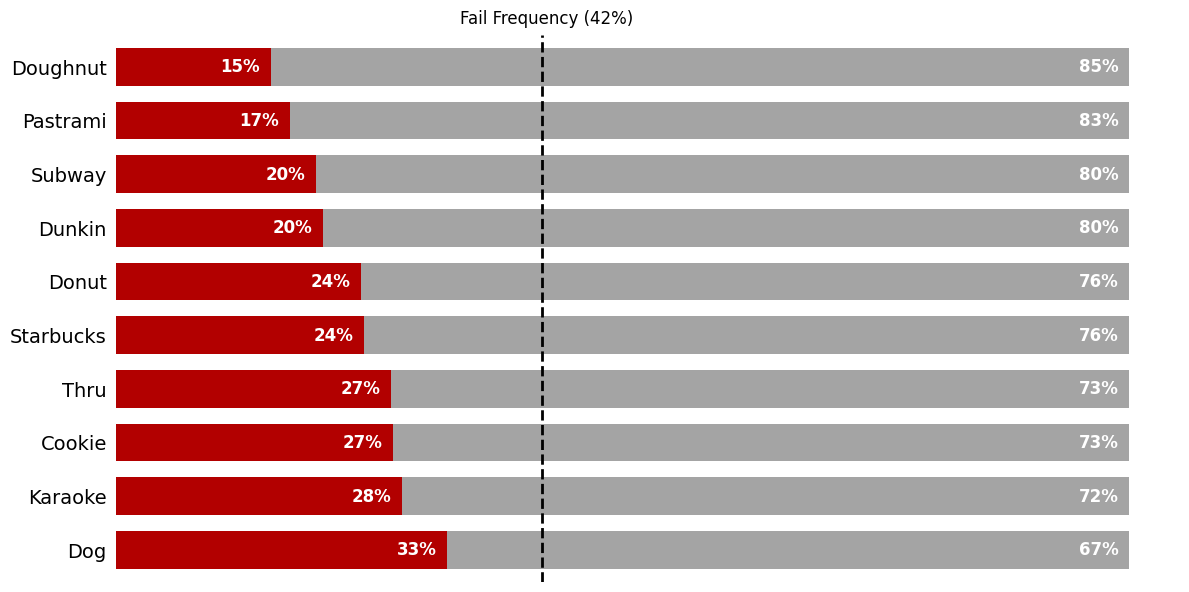

In [56]:
custom_colors = {'Pass': '#a4a4a4', 'Fail': '#B20000', 'All': 'grey'}
v.plot_top_words_freq_small(word_prop_c_low, column='Fail', top_n=10, include_all=False, custom_colors=custom_colors, figsize=(12, 6), title='', reference_line_percent=42)

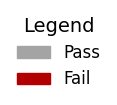

In [66]:
# Example usage:
custom_colors = {'Pass': '#a4a4a4', 'Fail': '#B20000'}
v.plot_legend_onlyv2(custom_colors, figsize=(1, 1))

In [67]:
word_prop_a_high = word_counts[(word_counts['All'] > 200)]#  & (word_counts['C '] < 17) & (word_counts['B '] < 24)]

word_prop_a_high = word_prop_a_high.sort_values('A ', ascending=False).head(20)

In [68]:
word_prop_a_high = word_prop_a_high[['All','A ', 'B ', 'C ']]
word_prop_a_high.head(20)

,All,A,B,C
Doughnut,210,84.761905,14.285714,0.952381
Pastrami,222,82.882883,10.810811,6.306306
Subway,213,80.281690,11.267606,8.450704
Dunkin,314,79.617834,16.560510,3.821656
Mcdonalds,314,79.617834,6.369427,14.012739
Donut,840,75.833333,20.952381,3.214286
Starbucks,433,75.519630,14.780600,9.699769
Thru,229,72.925764,19.213974,7.860262
Cooky,506,72.727273,12.648221,14.624506
Cookie,242,72.727273,17.768595,9.504132


In [69]:
# Assuming word_prop_a_high is your existing DataFrame
# Step 1: Keep the 'All' column
# Step 2: Rename 'A' to 'Pass'
word_prop_a_high.rename(columns={'A ': 'Pass'}, inplace=True)

# Step 3: Sum 'B' and 'C' into 'Fail'
word_prop_a_high['Fail'] = word_prop_a_high['B '] + word_prop_a_high['C ']

# Drop the old 'B' and 'C' columns
word_prop_a_high.drop(columns=['B ', 'C '], inplace=True)

# Now your DataFrame should have columns: 'All', 'Pass', 'Fail'
word_prop_a_high.head()

,All,Pass,Fail
Doughnut,210,84.761905,15.238095
Pastrami,222,82.882883,17.117117
Subway,213,80.281690,19.718310
Dunkin,314,79.617834,20.382166
Mcdonalds,314,79.617834,20.382166


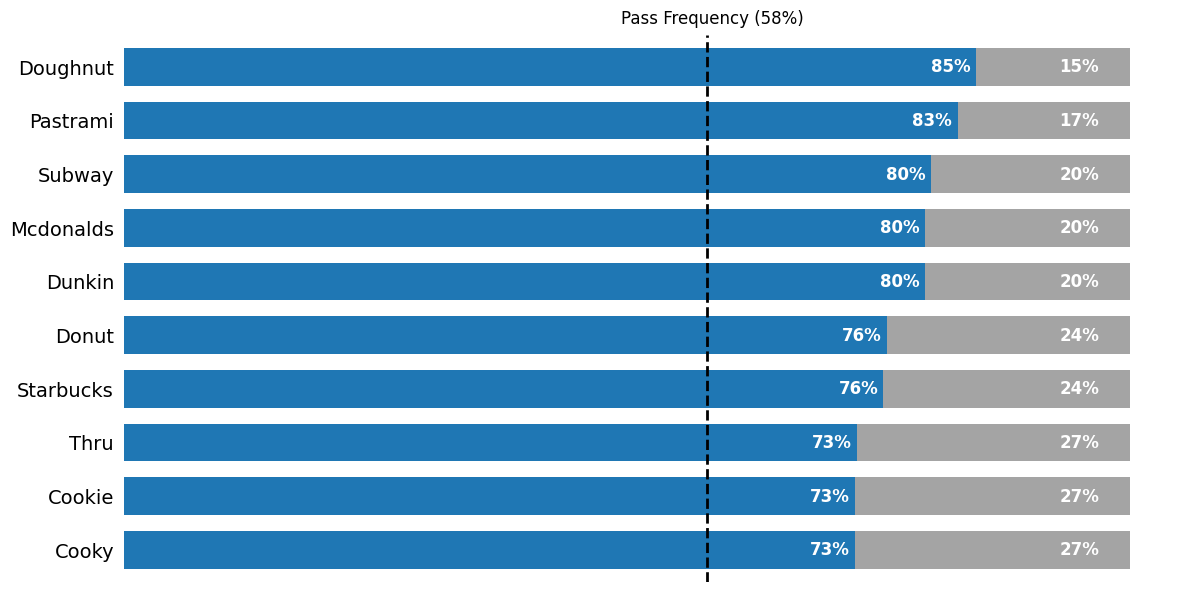

In [80]:
custom_colors = {'Pass': '#1f77b4', 'Fail': '#a4a4a4', 'All': 'grey'}
v.plot_top_words_freq(word_prop_a_high, column='Pass', top_n=10, include_all=False, custom_colors=custom_colors, figsize=(12, 6), title='', reference_line_percent=58)

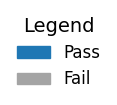

In [77]:
# Example usage:
custom_colors = {'Pass': '#1f77b4', 'Fail': '#a4a4a4'}
v.plot_legend_onlyv2(custom_colors, figsize=(1, 1))

In [130]:
word_prop_b_high = word_counts[(word_counts['All'] > 200)]#  & (word_counts['C '] < 17) & (word_counts['B '] < 24)]

word_prop_b_high.sort_values('B ', ascending=False).head(20)

,All,A,B,C,A,B,C
patty,370,158,166,46,42.702703,44.864865,12.432432
japanese,416,136,182,98,32.692308,43.750000,23.557692
ramen,455,119,191,145,26.153846,41.978022,31.868132
duck,460,139,189,132,30.217391,41.086957,28.695652
homemade,321,151,122,48,47.040498,38.006231,14.953271
pot,248,101,93,54,40.725806,37.500000,21.774194
curry,924,355,338,231,38.419913,36.580087,25.000000
deli,222,103,81,38,46.396396,36.486486,17.117117
meatball,250,91,89,70,36.400000,35.600000,28.000000
pasta,1053,462,365,226,43.874644,34.662868,21.462488


In [131]:
word_prop_b_high = word_prop_b_high[['All','A ', 'B ', 'C ']]
word_prop_b_high.head()

,All,A,B,C
wa,50463,51.419852,26.631393,21.948755
food,36404,50.087902,27.098670,22.813427
good,25900,52.355212,26.065637,21.579151
great,22987,52.373080,26.645495,20.981424
place,19657,53.110851,25.680419,21.208730


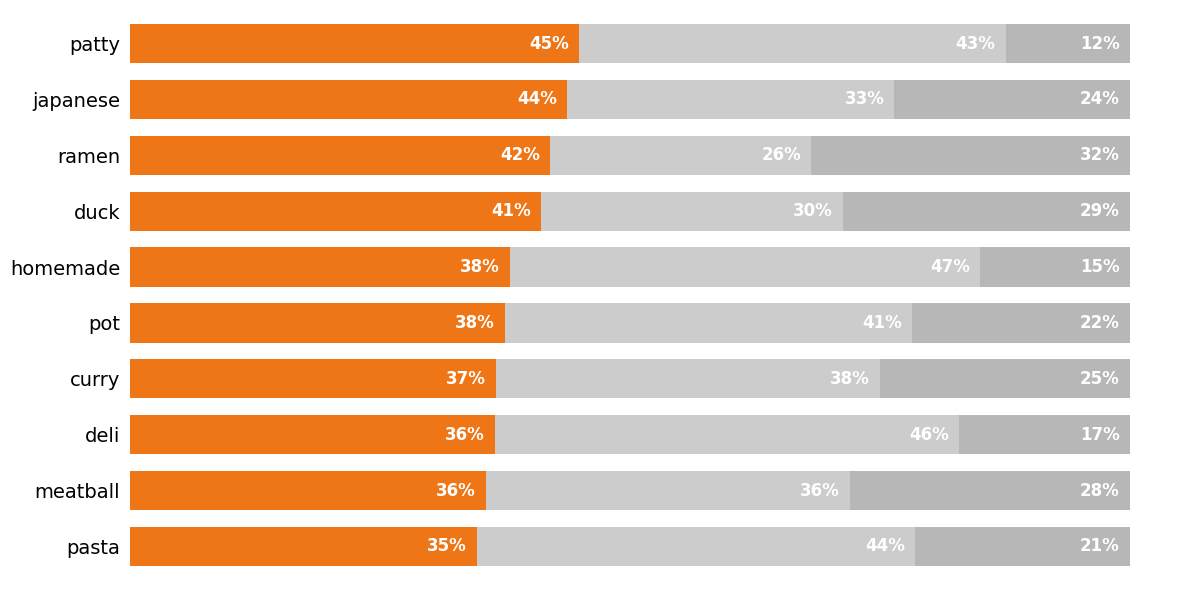

In [134]:
custom_colors = {'A ': '#CCCCCC', 'B ': '#EE7617', 'C ': '#B7B7B7', 'All': 'grey'}
v.plot_top_words_freq(word_prop_b_high, column='B ', top_n=10, include_all=False, custom_colors=custom_colors, figsize=(12, 6), title='')

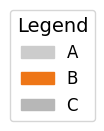

In [135]:
# Example usage:
custom_colors = {'A ': '#CCCCCC', 'B ': '#EE7617', 'C ': '#B7B7B7'}
v.plot_legend_onlyv2(custom_colors, figsize=(1, 1))

___
___
___
# Unique words

In [12]:
word_counts = e.word_counts(ny, reset_index=False, text_column='reviews_unique')

In [13]:
word_counts.head(5)

,All,A,B,C
good,3892,2232,947,713
wa,3882,2250,931,701
food,3695,2079,926,690
place,3631,2082,895,654
great,3598,2056,885,657


In [14]:
word_counts['A '] = (word_counts['A'] / word_counts['All']) * 100
word_counts['B '] = (word_counts['B'] / word_counts['All']) * 100
word_counts['C '] = (word_counts['C'] / word_counts['All']) * 100
word_counts.head()

,All,A,B,C,A,B,C
good,3892,2232,947,713,57.348407,24.331963,18.319630
wa,3882,2250,931,701,57.959815,23.982483,18.057702
food,3695,2079,926,690,56.265223,25.060893,18.673884
place,3631,2082,895,654,57.339576,24.648857,18.011567
great,3598,2056,885,657,57.142857,24.596998,18.260145


In [25]:
word_prop_c_high = word_counts[(word_counts['C'] > 100)]# & ((word_counts['A '] < word_counts['C ']) | (word_counts['B '] < word_counts['C ']))]

word_prop_c_high.sort_values('C ', ascending=False).head(20)

,All,A,B,C,A,B,C
bean,401,194,102,105,48.379052,25.436409,26.184539
cook,452,219,115,118,48.451327,25.442478,26.106195
pork,503,237,135,131,47.117296,26.838966,26.043738
1010,437,216,109,112,49.427918,24.942792,25.629291
comfortable,399,207,91,101,51.879699,22.807018,25.313283
authentic,711,339,195,177,47.679325,27.426160,24.894515
rice,1038,501,279,258,48.265896,26.878613,24.855491
kitchen,484,238,126,120,49.173554,26.033058,24.793388
100,417,210,104,103,50.359712,24.940048,24.700240
flavorful,544,266,145,133,48.897059,26.654412,24.448529


In [21]:
word_prop_c_high = word_prop_c_high[['All','A ', 'B ', 'C ']]
word_prop_c_high.head()

,All,A,B,C
good,3892,57.348407,24.331963,18.319630
wa,3882,57.959815,23.982483,18.057702
food,3695,56.265223,25.060893,18.673884
place,3631,57.339576,24.648857,18.011567
great,3598,57.142857,24.596998,18.260145


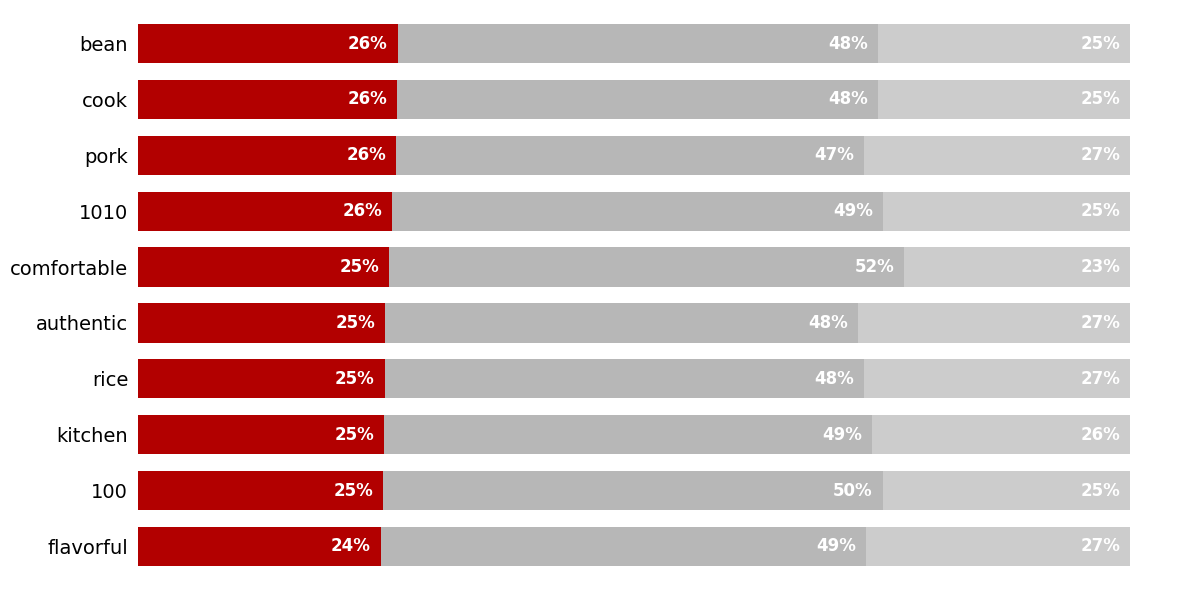

In [22]:
custom_colors = {'A ': '#B7B7B7', 'B ': '#CCCCCC', 'C ': '#B20000', 'All': 'grey'}
v.plot_top_words_freq(word_prop_c_high, column='C ', top_n=10, include_all=False, custom_colors=custom_colors, figsize=(12, 6), title='')

In [11]:
# Regex pattern for finding emojis
def extract_emojis(text):
    emoji_pattern = regex.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=regex.UNICODE)
    
    return ' '.join(emoji_pattern.findall(text))


In [12]:
import regex

In [14]:

# Apply the function to create a new column with only emojis
ny['emoji_reviews'] = ny['reviews'].apply(extract_emojis)

# Perform the split and stack to get all individual emojis
all_emojis = ny['emoji_reviews'].str.split(expand=True).stack()

# Frequency count of all emojis
all_freq = pd.Series(all_emojis).value_counts().sort_values(ascending=False).astype(int)


In [15]:
all_freq.head(20)  # Display the top emojis by frequency



😋     643
👍     547
👌     281
❤️    273
😊     187
😍     171
🤤     122
🍕     106
👏      91
👎      80
😂      79
🔥      77
💯      74
😁      68
🥰      65
😉      62
🤩      60
😀      56
☺️     54
❤      54
Name: count, dtype: int64

In [16]:
all_emojis

2     0      🇭🇰
6     0       😒
      1       👌
7     0      ❤️
8     0     👍👍👍
           ... 
4094  14     👍🏻
      15     👌🏼
      16      😂
4095  0       😂
4097  0       🥐
Length: 8435, dtype: object

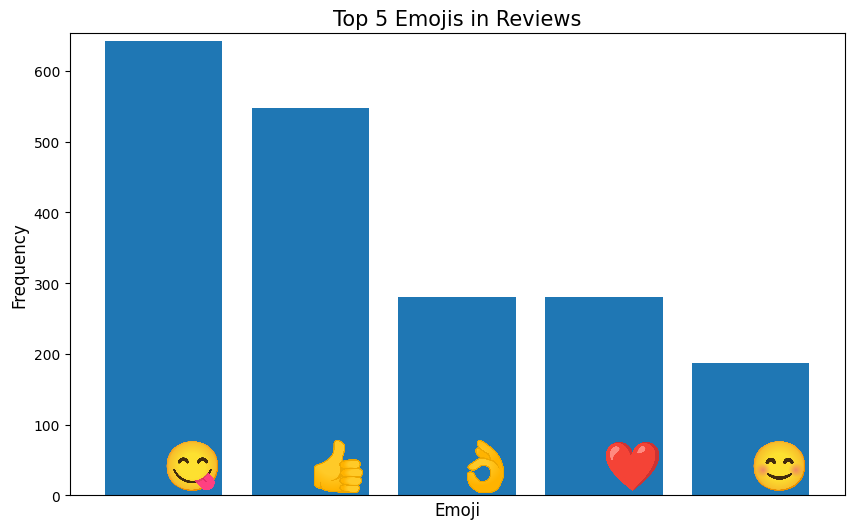

In [24]:
from imojify import imojify
from matplotlib import pyplot as plt 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Define the function to place an emoji image at given coordinates
def offset_image(coord, emoji, ax):
    img = plt.imread(imojify.get_img_path(emoji))
    im = OffsetImage(img, zoom=0.08)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0), xycoords='data', frameon=False, pad=0, box_alignment=(0.0, 0.0))
    ax.add_artist(ab)

# Your existing code to plot the data
plt.figure(figsize=(10, 6))
plt.bar(top_emojis, top_counts)

# Remove the current labels
plt.xticks([])

# Set the new emoji labels using the offset_image function
for i, emoji in enumerate(top_emojis):
    offset_image(i, emoji, plt.gca())

# Adjust the axis and padding if necessary
plt.ylim(0, max(top_counts) + 10)
plt.tick_params(axis='x', which='major', pad=15)

# Add title and labels with default font
plt.title('Top 5 Emojis in Reviews', fontsize=15)
plt.xlabel('Emoji', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()
